In [42]:
import sys

sys.path.append('../../code/')
import os
import json
from datetime import datetime
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import igraph as ig

from load_data import load_citation_network_igraph, case_info

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_dir = '../../data/'
court_name = 'scotus'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# this will be a little slow the first time you run it
G = load_citation_network_igraph(data_dir, court_name)

print 'loaded %s network with %d cases and %d edges' % (court_name, len(G.vs), len(G.es))

0 seconds for 250465 edges
loaded scotus network with 33248 cases and 250465 edges


# grab brown vs board subgraph

In [32]:
bvb = G.vs.select(name=105221)[0]
bvb_index = 5031

In [78]:
sg = G.subgraph(G.neighbors(5031))
sg.to_undirected()

sg.delete_vertices(sg.vs.select(_degree=0)) #remove unconnected compoenets

In [79]:
sg.summary()

'IGRAPH UN-- 179 1074 -- \n+ attr: court (v), name (v), year (v)'

# time vs. degree layout

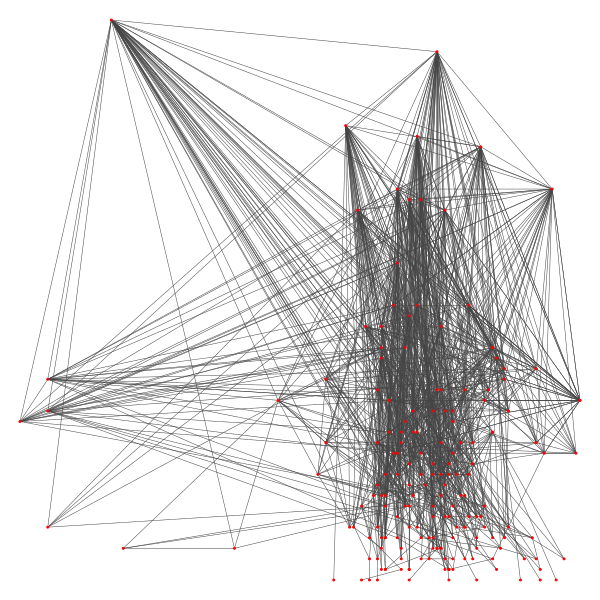

In [80]:
layout = []

for v in sg.vs:
    layout.append([v['year'], -v.indegree()])

visual_style = {}
visual_style["layout"] = layout

# # vertices

visual_style['vertex_size'] = 2

visual_style['vertex_color'] = 'red'
visual_style['vertex_frame_color'] = 'red'

visual_style['edge_arrow_size'] = 0
visual_style['edge_width'] = .5
visual_style['edge_alpha'] = .5

ig.plot(sg, **visual_style)

# graph laplacian layout

In [82]:
L = np.matrix(sg.laplacian())

In [93]:
Lambda, V = np.linalg.eig(L)

eig_order = Lambda.argsort()[::-1]
Lambda = Lambda[eig_order]

V = V[:,eig_order]

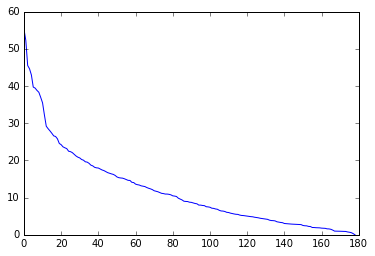

In [94]:
plt.plot(range(len(Lambda)), Lambda)

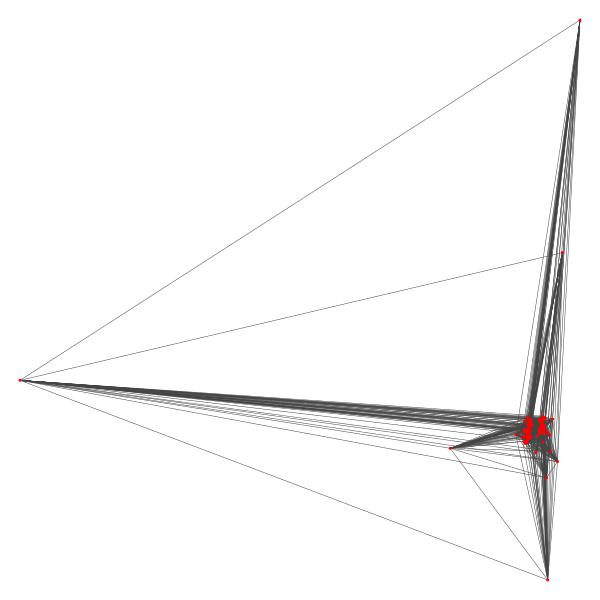

In [109]:
layout = []

for i in range(len(sg.vs)):
    layout.append([V[i, 1], V[i, 2]])

visual_style = {}
visual_style["layout"] = layout

# # vertices

visual_style['vertex_size'] = 2

visual_style['vertex_color'] = 'red'
visual_style['vertex_frame_color'] = 'red'

visual_style['edge_arrow_size'] = 0
visual_style['edge_width'] = .5
visual_style['edge_alpha'] = .5

ig.plot(sg, **visual_style)

# SCOTUS

In [ ]:
L = np.matrix(G.laplacian())

Lambda, V = np.linalg.eig(L)

eig_order = Lambda.argsort()[::-1]
Lambda = Lambda[eig_order]

V = V[:,eig_order]

In [ ]:
layout = []

for i in range(len(G.vs)):
    layout.append([V[i, 1], V[i, 2]])

visual_style = {}
visual_style["layout"] = layout

# # vertices

visual_style['vertex_size'] = 2

visual_style['vertex_color'] = 'red'
visual_style['vertex_frame_color'] = 'red'

visual_style['edge_arrow_size'] = 0
visual_style['edge_width'] = .5
visual_style['edge_alpha'] = .5

ig.plot(sg, **visual_style)